In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset
file_path = '../data/raw_data.csv'
df = pd.read_csv(file_path)

In [38]:
# Identifying columns with missing values
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [39]:
# Filling missing values only for numeric columns
df.fillna(df.select_dtypes(include='number').median(), inplace=True)

# Verifying missing values are handled
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [40]:
# checking the number of unique values in 'SALE_COND' column

value_counts = df['SALE_COND'].value_counts()
print(value_counts)

SALE_COND
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: count, dtype: int64


In [41]:
# Replacing the incorrect values with the correct ones
df['SALE_COND'] = df['SALE_COND'].replace({
    'Adj Land': 'AdjLand',
    'Ab Normal': 'AbNormal',
    'Partiall': 'Partial',
    'PartiaLl': 'Partial'
})

df['SALE_COND'] = df['SALE_COND'].str.lower()

# Verifying the changes
print(df['SALE_COND'].value_counts())


SALE_COND
adjland        1439
partial        1433
normal sale    1423
abnormal       1411
family         1403
Name: count, dtype: int64


In [42]:
# checking the number of unique values in 'UTILITY_AVAIL' column

value_counts = df['UTILITY_AVAIL'].value_counts()
print(value_counts)

UTILITY_AVAIL
AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: count, dtype: int64


In [43]:
# Replacing the incorrect values with the correct ones
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({
    'All Pub': 'AllPub'
})

df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].str.lower()

# Verifying the changes
print(df['UTILITY_AVAIL'].value_counts())

UTILITY_AVAIL
allpub     1887
nosewa     1871
nosewr     1829
elo        1522
Name: count, dtype: int64


In [44]:
# checking the number of unique values in 'STREET' column

value_counts = df['STREET'].value_counts()
print(value_counts)

STREET
Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: count, dtype: int64


In [45]:
# Replacing the incorrect values with the correct ones
df['STREET'] = df['STREET'].replace({
    'Pavd': 'Paved',
    'NoAccess': 'No Access'
})

df['STREET'] = df['STREET'].str.lower()

# Verifying the changes
print(df['STREET'].value_counts())

STREET
paved        2572
gravel       2520
no access    2017
Name: count, dtype: int64


In [46]:
# checking the number of unique values in 'MZZONE' column

value_counts = df['MZZONE'].value_counts()
print(value_counts)

MZZONE
RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: count, dtype: int64


In [47]:
df['MZZONE'] = df['MZZONE'].str.lower()

value_counts = df['MZZONE'].value_counts()
print(value_counts)

MZZONE
rl    1858
rh    1822
rm    1817
c      550
a      537
i      525
Name: count, dtype: int64


In [48]:
# checking the number of unique values in 'BUILDTYPE' column

value_counts = df['BUILDTYPE'].value_counts()
print(value_counts)

BUILDTYPE
House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: count, dtype: int64


In [49]:
# Replacing the incorrect values with the correct ones
df['BUILDTYPE'] = df['BUILDTYPE'].replace({
    'Comercial': 'Commercial',
    'Other': 'Others'
})

df['BUILDTYPE'] = df['BUILDTYPE'].str.lower()

# Verifying the changes
print(df['BUILDTYPE'].value_counts())

BUILDTYPE
house         2444
others        2336
commercial    2329
Name: count, dtype: int64


In [50]:
# checking the number of unique values in 'PARK_FACIL' column

df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [51]:
# Replacing the incorrect values with the correct ones

df['PARK_FACIL'] = df['PARK_FACIL'].replace({'Noo': 'No'})

df['PARK_FACIL'] = df['PARK_FACIL'].str.lower()

df['PARK_FACIL'].unique()

array(['yes', 'no'], dtype=object)

In [52]:
# correcting the values in 'AREA' 

df['AREA'] = df['AREA'].replace({'Chrompt': 'Chrompet', 'Chrmpet': 'Chrompet','Chormpet':'Chrompet','TNagar':'T Nagar','Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Velchery':'Velachery','Ann Nagar':'Anna Nagar','Adyr':'Adyar','KKNagar':'KK Nagar'})
df['AREA'].value_counts()

AREA
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: count, dtype: int64

In [53]:
# Step 1: Identifying missing dates
def get_missing_dates(df):
    all_dates = pd.date_range(start=df.index.min(), end=df.index.max())
    missing_dates = all_dates.difference(df.index)
    return missing_dates

# Step 2: Separating the extra records, keeping the first occurrence for each date
def separate_extra_records(df):
    first_occurrences = df[~df.index.duplicated(keep='first')]
    extra_records = df[df.index.duplicated(keep='first')]
    return first_occurrences, extra_records

# Step 3: Attempting to match missing dates with extra records within ±21 days
def fill_missing_dates(shift_df, extra_records, missing_dates):
    filled_dates = []
    
    for missing_date in missing_dates:
        # Finding a date within ±21 days that has extra records
        for offset in range(-21, 22):  # Considering ±21 days
            check_date = missing_date + pd.Timedelta(days=offset)
            
            if check_date in extra_records.index:
                # Getting the extra record(s) for the check_date
                extra_record = extra_records.loc[check_date]
                
                # Handling the case where extra_record is a single Series instead of a DataFrame
                if isinstance(extra_record, pd.Series):
                    extra_record = extra_record.to_frame().T

                # Copying the first extra record
                extra_record_copy = extra_record.iloc[0].copy()
                
                # Setting its new date to the missing date
                extra_record_copy.name = missing_date
                
                # Adding this record to the shift_df
                shift_df = pd.concat([shift_df, pd.DataFrame([extra_record_copy])])
                
                # Removing the used record from extra_records
                prt_id_to_remove = extra_record_copy['PRT_ID']
                extra_records = extra_records[extra_records['PRT_ID'] != prt_id_to_remove]
                
                # Marking the missing date as filled
                filled_dates.append(missing_date)
                break
    
    # Sorting shift_df by index (date)
    shift_df.sort_index(inplace=True)
    
    # Remaining missing dates
    remaining_missing_dates = [date for date in missing_dates if date not in filled_dates]
    
    return shift_df, remaining_missing_dates, extra_records

# changing the date columns to datetime format

df.DATE_SALE = pd.to_datetime(df.DATE_SALE, format='%d-%m-%Y')
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD, format='%d-%m-%Y')

df.set_index('DATE_SALE', inplace = True)
df = df.sort_index()

shift_df = df.copy()

# Getting missing dates
missing_dates = get_missing_dates(shift_df)

# Separating first occurrences and extra records
first_occurrences, extra_records = separate_extra_records(shift_df)

# Filling missing dates with extra records
filled_shift_df, remaining_missing_dates, remaining_extra_records = fill_missing_dates(first_occurrences, extra_records, missing_dates)

# Result: filled_shift_df with missing dates filled, and remaining unfilled records in remaining_missing_dates and remaining_extra_records


In [54]:
len(filled_shift_df)

3360

In [55]:
len(remaining_missing_dates)

691

In [56]:
len(remaining_extra_records)

3749

691


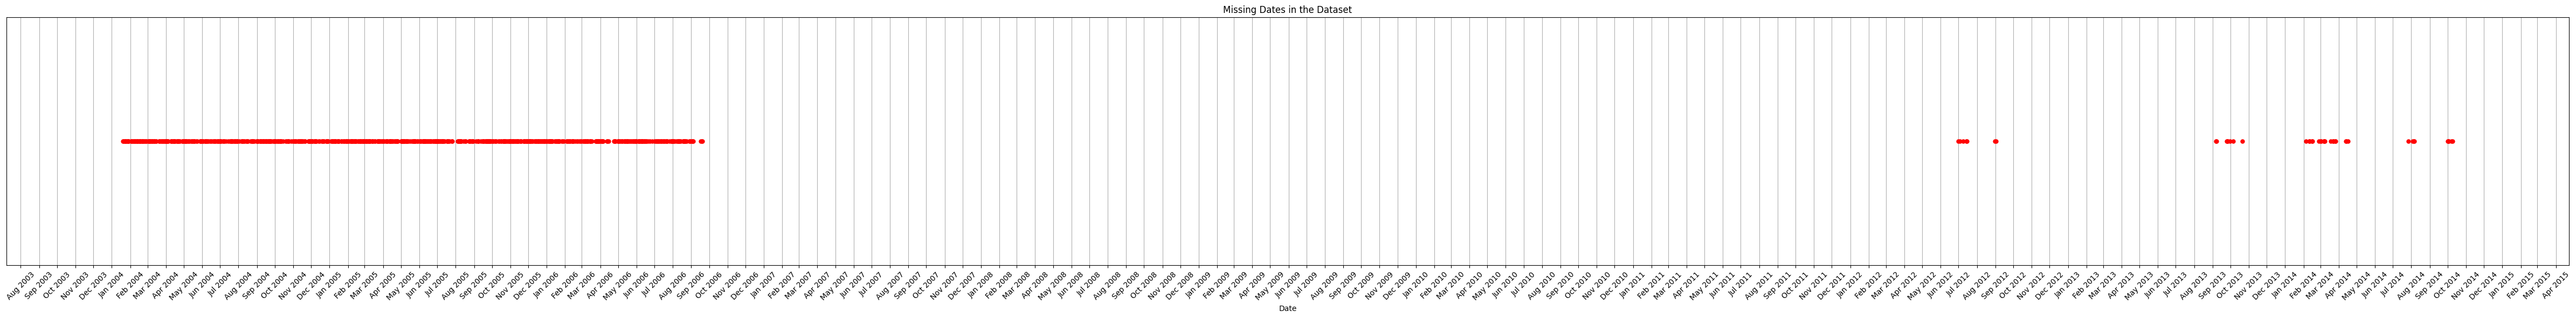

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensuring dates are in datetime format
missing_dates = pd.to_datetime(remaining_missing_dates)

print(len(remaining_missing_dates))

# Plotting missing dates
plt.figure(figsize=(48, 6))
plt.plot(remaining_missing_dates, [1] * len(remaining_missing_dates), 'ro', markersize=5)
plt.yticks([])  # Hide y-axis ticks
plt.xlabel('Date')
plt.title('Missing Dates in the Dataset')

# Formatting the x-axis to show months and years
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Month Year'

plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

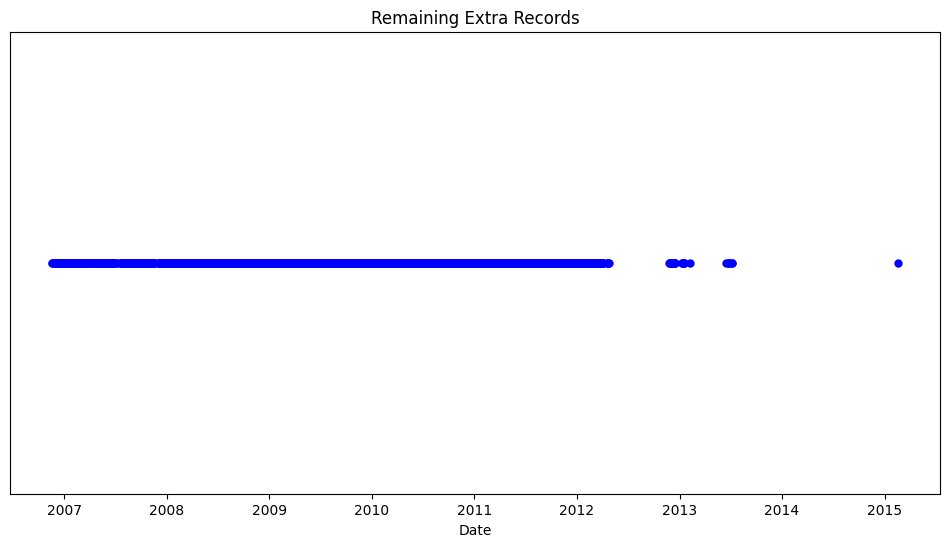

In [58]:
# Ensuring the dates are in a list or hashable format
remaining_extra_records_dates = remaining_extra_records.index.tolist()

# Plotting remaining extra records by their dates
plt.figure(figsize=(12, 6))
plt.plot(remaining_extra_records_dates, [1] * len(remaining_extra_records_dates), 'bo', markersize=5)  # 'bo' for blue dots
plt.yticks([])  # Hide y-axis ticks
plt.xlabel('Date')
plt.title('Remaining Extra Records')
plt.show()


In [59]:
# Defining the cutoff date
cutoff_date = pd.to_datetime('2006-09-01')

# Filtering the dataframes to only include records from September 2006 onwards
filtered_shift_df = filled_shift_df[filled_shift_df.index >= cutoff_date]
filtered_extra_records = remaining_extra_records[remaining_extra_records.index >= cutoff_date]


In [60]:
# Concatenating the two dataframes
merged_df = pd.concat([filtered_shift_df, filtered_extra_records])

# Ensuring the DataFrame is sorted by date
merged_df.sort_index(inplace=True)


In [61]:
# Adding the record_count feature (number of records per date)
merged_df['record_count'] = merged_df.groupby(merged_df.index)['PRT_ID'].transform('count')

# Adding the multiple_records feature (binary indicator)
merged_df['multiple_records'] = (merged_df['record_count'] > 1).astype(int)


In [62]:
len(merged_df)

6791

In [63]:
all_dates_m = pd.date_range(start=merged_df.index.min(), end=merged_df.index.max())
missing_dates_m = all_dates_m.difference(merged_df.index)
len(missing_dates_m)

46

In [65]:
file_path = '../data/preprocessed_data.csv'
merged_df.to_csv(file_path, index=True)